In [ ]:
!pip install -r requirements.txt

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

## Caricamento dataset

In [2]:
train_path = 'train.csv' 
train_data = pd.read_csv(train_path)

test_path = 'test.csv' 
test_data = pd.read_csv(test_path)

In [3]:
train_data

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,Yes,7.927529e+11,5601722,F,2016-04-19T13:34:43Z,2016-05-12T00:00:00Z,19,JESUS DE NAZARETH,0,0,0,0,0,1
1,No,7.388932e+13,5629990,M,2016-04-27T14:28:48Z,2016-05-04T00:00:00Z,61,SÃO PEDRO,0,1,0,0,0,1
2,Yes,5.735180e+13,5587181,F,2016-04-15T08:22:55Z,2016-05-10T00:00:00Z,26,CARATOÍRA,1,0,0,0,0,0
3,No,3.884549e+10,5655256,F,2016-05-03T16:27:26Z,2016-05-09T00:00:00Z,59,DO MOSCOSO,1,0,0,0,0,0
4,No,3.171650e+13,5582255,F,2016-04-14T09:10:01Z,2016-04-29T00:00:00Z,3,JUCUTUQUARA,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70731,No,2.718592e+12,5739059,F,2016-05-25T12:26:29Z,2016-06-02T00:00:00Z,53,MATA DA PRAIA,0,0,0,0,0,1
70732,No,4.182122e+11,5752744,M,2016-05-31T12:29:07Z,2016-05-31T00:00:00Z,2,SANTA TEREZA,0,0,0,0,0,0
70733,Yes,7.744526e+13,5633152,F,2016-04-28T08:54:26Z,2016-06-02T00:00:00Z,19,DA PENHA,0,0,0,0,0,1
70734,No,4.369235e+13,5748580,F,2016-05-31T07:09:29Z,2016-05-31T00:00:00Z,6,JARDIM CAMBURI,0,0,0,0,0,0


In [4]:
test_data

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,Yes,7.679513e+13,5666852,F,2016-05-06T07:09:53Z,2016-05-06T00:00:00Z,55,ILHA DAS CAIEIRAS,0,0,0,0,0,0
1,No,6.627685e+11,5667905,M,2016-05-06T08:15:19Z,2016-05-11T00:00:00Z,61,VILA RUBIM,0,0,0,0,0,1
2,No,1.477576e+11,5659349,F,2016-05-04T13:40:56Z,2016-06-01T00:00:00Z,31,JABOUR,1,0,0,0,0,1
3,No,4.969333e+12,5740714,F,2016-05-25T15:54:10Z,2016-06-01T00:00:00Z,45,SANTA TEREZA,0,1,0,0,0,1
4,No,5.547825e+12,5731179,F,2016-05-24T09:39:04Z,2016-05-24T00:00:00Z,4,MONTE BELO,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,No,8.299484e+12,5691310,M,2016-05-12T12:03:44Z,2016-05-12T00:00:00Z,39,JARDIM CAMBURI,0,0,0,0,0,0
17681,No,8.277242e+13,5621733,M,2016-04-26T10:44:03Z,2016-06-06T00:00:00Z,0,GURIGICA,0,0,0,0,0,1
17682,No,2.339556e+10,5715497,F,2016-05-18T14:28:19Z,2016-06-08T00:00:00Z,31,INHANGUETÁ,0,0,0,0,0,1
17683,No,8.568283e+12,5788529,F,2016-06-08T12:49:55Z,2016-06-08T00:00:00Z,42,SANTO ANTÔNIO,0,0,0,0,0,0


## Preprocessing dei dati

In [5]:
# assegno i valori 0 e 1 alla colonna target
train_data['No-show'] = train_data['No-show'].map({'Yes': 1, 'No': 0})
test_data['No-show'] = test_data['No-show'].map({'Yes': 1, 'No': 0})

In [6]:
# elimino eventuali outliers per la colonna 'Age'
train_data=train_data[(train_data['Age']>=0) & (train_data['Age']<=100)]
test_data=test_data[(test_data['Age']>=0) & (test_data['Age']<=100)]

In [7]:
# faccio per sicurezza una copia dei dati su cui operare le successive modifiche 
# (anche per evitare eventuali warning causati da modifiche sul dataframe stesso)
train=train_data.copy()
test=test_data.copy()
# converto i valori delle colonne 'ScheduledDay' e 'AppointmentDay' al tipo DateTime
train['ScheduledDay'] = pd.to_datetime(train['ScheduledDay'])
train['AppointmentDay'] = pd.to_datetime(train['AppointmentDay'])
test['ScheduledDay'] = pd.to_datetime(test['ScheduledDay'])
test['AppointmentDay'] = pd.to_datetime(test['AppointmentDay'])

In [8]:
train

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,1,7.927529e+11,5601722,F,2016-04-19 13:34:43+00:00,2016-05-12 00:00:00+00:00,19,JESUS DE NAZARETH,0,0,0,0,0,1
1,0,7.388932e+13,5629990,M,2016-04-27 14:28:48+00:00,2016-05-04 00:00:00+00:00,61,SÃO PEDRO,0,1,0,0,0,1
2,1,5.735180e+13,5587181,F,2016-04-15 08:22:55+00:00,2016-05-10 00:00:00+00:00,26,CARATOÍRA,1,0,0,0,0,0
3,0,3.884549e+10,5655256,F,2016-05-03 16:27:26+00:00,2016-05-09 00:00:00+00:00,59,DO MOSCOSO,1,0,0,0,0,0
4,0,3.171650e+13,5582255,F,2016-04-14 09:10:01+00:00,2016-04-29 00:00:00+00:00,3,JUCUTUQUARA,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70731,0,2.718592e+12,5739059,F,2016-05-25 12:26:29+00:00,2016-06-02 00:00:00+00:00,53,MATA DA PRAIA,0,0,0,0,0,1
70732,0,4.182122e+11,5752744,M,2016-05-31 12:29:07+00:00,2016-05-31 00:00:00+00:00,2,SANTA TEREZA,0,0,0,0,0,0
70733,1,7.744526e+13,5633152,F,2016-04-28 08:54:26+00:00,2016-06-02 00:00:00+00:00,19,DA PENHA,0,0,0,0,0,1
70734,0,4.369235e+13,5748580,F,2016-05-31 07:09:29+00:00,2016-05-31 00:00:00+00:00,6,JARDIM CAMBURI,0,0,0,0,0,0


In [9]:
test

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,1,7.679513e+13,5666852,F,2016-05-06 07:09:53+00:00,2016-05-06 00:00:00+00:00,55,ILHA DAS CAIEIRAS,0,0,0,0,0,0
1,0,6.627685e+11,5667905,M,2016-05-06 08:15:19+00:00,2016-05-11 00:00:00+00:00,61,VILA RUBIM,0,0,0,0,0,1
2,0,1.477576e+11,5659349,F,2016-05-04 13:40:56+00:00,2016-06-01 00:00:00+00:00,31,JABOUR,1,0,0,0,0,1
3,0,4.969333e+12,5740714,F,2016-05-25 15:54:10+00:00,2016-06-01 00:00:00+00:00,45,SANTA TEREZA,0,1,0,0,0,1
4,0,5.547825e+12,5731179,F,2016-05-24 09:39:04+00:00,2016-05-24 00:00:00+00:00,4,MONTE BELO,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,0,8.299484e+12,5691310,M,2016-05-12 12:03:44+00:00,2016-05-12 00:00:00+00:00,39,JARDIM CAMBURI,0,0,0,0,0,0
17681,0,8.277242e+13,5621733,M,2016-04-26 10:44:03+00:00,2016-06-06 00:00:00+00:00,0,GURIGICA,0,0,0,0,0,1
17682,0,2.339556e+10,5715497,F,2016-05-18 14:28:19+00:00,2016-06-08 00:00:00+00:00,31,INHANGUETÁ,0,0,0,0,0,1
17683,0,8.568283e+12,5788529,F,2016-06-08 12:49:55+00:00,2016-06-08 00:00:00+00:00,42,SANTO ANTÔNIO,0,0,0,0,0,0


In [10]:
# ho notato che nella colonna 'ScheduledDay' viene tenuto conto anche dell'ora, ma in 'AppointmentDay' no
# non ritenendo l'ora significativa per quella colonna decido di convertire entrambe le colonne al tipo date
train['ScheduledDay'] = train['ScheduledDay'].dt.date
train['AppointmentDay'] = train['AppointmentDay'].dt.date
test['ScheduledDay'] = test['ScheduledDay'].dt.date
test['AppointmentDay'] = test['AppointmentDay'].dt.date

In [11]:
# creo poi una nuova colonna con il numero di giorni intercorsi tra 'AppointmentDay' e 'ScheduledDay'
# cioè i giorni intercorsi tra quando è stato registrato l'appuntamento e il giorno dell'appuntamento
# questa nuova colonna potrebbe dare informazioni significative
train['WaitingDays']=(train['AppointmentDay']-train['ScheduledDay']).dt.days
test['WaitingDays']=(test['AppointmentDay']-test['ScheduledDay']).dt.days

In [12]:
# controllo poi se ci sono casi in cui questa colonna ha un valore negativo
train[train['WaitingDays']<0]

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays
5315,1,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,-1
24772,1,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,-6


In [13]:
test[test['WaitingDays']<0]

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays
2984,1,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,-1


In [14]:
# considero questi casi degli errori nella registrazione dell'appuntamento, e elimino quindi le relative righe
train=train[train['WaitingDays']>=0]
test=test[test['WaitingDays']>=0]

In [15]:
# controllo poi che tali negativi non siano più presenti
train[train['WaitingDays']<0]

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays


In [16]:
test[test['WaitingDays']<0]

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays


In [17]:
# controllo i valori unici della colonna 'Handcap'
train['Handcap'].value_counts()

0    69279
1     1324
2      116
3       10
4        3
Name: Handcap, dtype: int64

In [18]:
test['Handcap'].value_counts()

0    17337
1      309
2       33
3        1
Name: Handcap, dtype: int64

In [19]:
# i valori di 'Handcap' vanno quindi tra 0 e 4, diversamente dalla descrizione del dataset fornita
# ritengo che i valori 1,2,3,4 indichino semplicemente una differenza nel tipo di handicap
# quindi decido di convertire a 1 tutti i valori tra 1 e 4
# 0 andrà quindi a indicare l'assenza di handicap e 1 la presenza
# decido di nuovo per sicurezza di operare da adesso su una copia dei dati precedenti 
# (anche per evitare eventuali warning causati da modifiche sul dataframe stesso)
train_data=train.copy()
test_data=test.copy()
train_data['Handcap'] = np.where(train_data['Handcap']>0, 1, 0)
test_data['Handcap'] = np.where(test_data['Handcap']>0, 1, 0)

In [20]:
# controllo di avere ora solo 0 e 1 nella colonna 'Handcap'
train_data['Handcap'].value_counts()

0    69279
1     1453
Name: Handcap, dtype: int64

In [21]:
test_data['Handcap'].value_counts()

0    17337
1      343
Name: Handcap, dtype: int64

In [22]:
# metto in relazione le features binarie alla colonna target
# faccio questo facendo la media di 'No-show' per ogni valore delle features binarie
# da qui osservo che le colonne 'Gender' e 'Alcoholism' sono poco indicative
# infatti rispetto ai due valori di queste due colonne osserviamo una minima variazione della media di 'No-show' 
features_to_check = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
for f in features_to_check:
    print(train_data.groupby(f)['No-show'].mean())

Gender
F    0.205546
M    0.200290
Name: No-show, dtype: float64
Scholarship
0    0.199943
1    0.237783
Name: No-show, dtype: float64
Hipertension
0    0.211219
1    0.173246
Name: No-show, dtype: float64
Diabetes
0    0.205928
1    0.175258
Name: No-show, dtype: float64
Alcoholism
0    0.204015
1    0.193548
Name: No-show, dtype: float64
Handcap
0    0.204073
1    0.185822
Name: No-show, dtype: float64
SMS_received
0    0.166962
1    0.281144
Name: No-show, dtype: float64


In [23]:
# decido di droppare la colonna 'ScheduledDay', presa già in considerazione nella creazione della colonna 'WaitingDays'
train_data = train_data.drop(['ScheduledDay'], axis=1)
test_data = test_data.drop(['ScheduledDay'], axis=1)

In [24]:
# decido di droppare la colonna 'AppointmentID' in quanto unica e quindi non utile
train_data = train_data.drop(['AppointmentID'], axis=1)
test_data = test_data.drop(['AppointmentID'], axis=1)

In [25]:
# individuo le colonne di tipo object
s = (train_data.dtypes == 'object')
object_cols = list(s[s].index)
print (object_cols)

['Gender', 'AppointmentDay', 'Neighbourhood']


In [26]:
# effettuo sulle colonne di tipo object il label encoding
# sul dataset di train effettuo sia il fit che il transform, mentre su quello di test solo il transform
# utilizzo poi un artificio per evitare errori se nei dati di test sono presenti valori non presenti in quelli di train
# ossia sostituisco ognuno di quei valori 'nuovi' di test con '<unknown>'
# e aggiungo '<unknown>' al dizionario del label encoder, in modo che venga riconosciuto
label_train = train_data.copy()
label_test = test_data.copy()
le = LabelEncoder()
for col in object_cols:
    label_train[col] = le.fit(train_data[col])
    label_test[col] = label_test[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
    le.classes_ = np.append(le.classes_, '<unknown>')
    label_train[col] = le.transform(train_data[col])
    label_test[col] = le.transform(label_test[col])

In [27]:
label_train

,No-show,PatientId,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays
0,1,7.927529e+11,0,9,19,40,0,0,0,0,0,1,23
1,0,7.388932e+13,1,3,61,77,0,1,0,0,0,1,7
2,1,5.735180e+13,0,7,26,9,1,0,0,0,0,0,25
3,0,3.884549e+10,0,6,59,18,1,0,0,0,0,0,6
4,0,3.171650e+13,0,0,3,42,0,0,0,0,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70731,0,2.718592e+12,0,22,53,45,0,0,0,0,0,1,8
70732,0,4.182122e+11,1,20,2,67,0,0,0,0,0,0,0
70733,1,7.744526e+13,0,22,19,15,0,0,0,0,0,1,35
70734,0,4.369235e+13,0,20,6,38,0,0,0,0,0,0,0


In [28]:
label_test

,No-show,PatientId,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays
0,1,7.679513e+13,0,5,55,29,0,0,0,0,0,0,0
1,0,6.627685e+11,1,8,61,80,0,0,0,0,0,1,5
2,0,1.477576e+11,0,21,31,37,1,0,0,0,0,1,28
3,0,4.969333e+12,0,21,45,67,0,1,0,0,0,1,7
4,0,5.547825e+12,0,17,4,46,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,0,8.299484e+12,1,9,39,38,0,0,0,0,0,0,0
17681,0,8.277242e+13,1,24,0,27,0,0,0,0,0,1,41
17682,0,2.339556e+10,0,26,31,35,0,0,0,0,0,1,21
17683,0,8.568283e+12,0,26,42,69,0,0,0,0,0,0,0


In [29]:
# scelgo le features da considerare
# non considero 'Gender' e 'Alcoholism' per i motivi precedentemente scritti (sono poco indicativi)
# non considero inoltre la colonna 'PatientId'
features=['AppointmentDay', 'Age','Neighbourhood', 'Scholarship', 'Hipertension',
            'Diabetes', 'Handcap', 'SMS_received','WaitingDays']

In [30]:
# seleziono la colonna target e i dati relativi alle features scelte
train_y = label_train['No-show']
train_X = label_train[features]
val_y = label_test['No-show']
val_X = label_test[features]

In [31]:
train_y

0        1
1        0
2        1
3        0
4        0
        ..
70731    0
70732    0
70733    1
70734    0
70735    0
Name: No-show, Length: 70732, dtype: int64

In [32]:
train_X

,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Handcap,SMS_received,WaitingDays
0,9,19,40,0,0,0,0,1,23
1,3,61,77,0,1,0,0,1,7
2,7,26,9,1,0,0,0,0,25
3,6,59,18,1,0,0,0,0,6
4,0,3,42,0,0,0,0,1,15
...,...,...,...,...,...,...,...,...,...
70731,22,53,45,0,0,0,0,1,8
70732,20,2,67,0,0,0,0,0,0
70733,22,19,15,0,0,0,0,1,35
70734,20,6,38,0,0,0,0,0,0


In [33]:
val_y

0        1
1        0
2        0
3        0
4        0
        ..
17680    0
17681    0
17682    0
17683    0
17684    0
Name: No-show, Length: 17680, dtype: int64

In [34]:
val_X

,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Handcap,SMS_received,WaitingDays
0,5,55,29,0,0,0,0,0,0
1,8,61,80,0,0,0,0,1,5
2,21,31,37,1,0,0,0,1,28
3,21,45,67,0,1,0,0,1,7
4,17,4,46,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
17680,9,39,38,0,0,0,0,0,0
17681,24,0,27,0,0,0,0,1,41
17682,26,31,35,0,0,0,0,1,21
17683,26,42,69,0,0,0,0,0,0


## Allenamento e accuracy

In [35]:
#ho implementato dei cicli per individuare i parametri migliori per DecisionTreeClassifier 
#ciclo su max_leaf_nodes:
#from sklearn.tree import DecisionTreeClassifier
#best_accuracy = 0
#best_max_leaf_nodes = 0
# valori di max_leaf_nodes da provare
#max_leaf_nodes_set = [5, 50, 500, 5000]

#for max_leaf_nodes in max_leaf_nodes_set:
#    model=DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes,random_state=0)
#    model.fit(train_X, train_y)
#    accuracy = model.score(val_X, val_y)
#    print("max_leaf_nodes: %d  \t\t Accuracy: %f" %(max_leaf_nodes, accuracy))
#    if accuracy > best_accuracy:
#        best_accuracy = accuracy
#        best_max_leaf_nodes = max_leaf_nodes
#print("Best max_leaf_nodes: %d  \t\t Best accuracy: %f" %(best_max_leaf_nodes, best_accuracy))

In [36]:
# ciclo su max_depth:
#best_accuracy = 0
#best_max_depth = 0
# provo i valori di max_depth da 3 a 10
#max_depth_set = range(3, 11)

#for max_depth in max_depth_set:
#    model=DecisionTreeClassifier(max_depth=max_depth, random_state=0)
#    model.fit(train_X, train_y)
#    accuracy = model.score(val_X, val_y)
#    print("max_depth: %d  \t\t Accuracy: %f" %(max_depth, accuracy))
#    if accuracy > best_accuracy:
#        best_accuracy = accuracy
#        best_max_depth = max_depth
#print("Best max_depth: %d  \t\t Best accuracy: %f" %(best_max_depth, best_accuracy))

In [37]:
# CLASSIFIER SCELTO
# ho deciso di utilizzare come modello DecisionTreeClassifier
# i parametri sono stati scelti dopo aver fatto girare qualche volta i cicli scritti sopra (commentati)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5,random_state=0)
model.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
preds = model.predict(val_X)
mae = mean_absolute_error(val_y,preds)
train_accuracy = model.score(train_X,train_y)*100
test_accuracy = model.score(val_X,val_y)*100

print('Mean absolute error: ')
print(mae)
print('Training set accuracy: ')
print(train_accuracy)
print('Test set accuracy: ')
print(test_accuracy)

Mean absolute error: 
0.1960972850678733
Training set accuracy: 
79.64004976531132
Test set accuracy: 
80.39027149321268


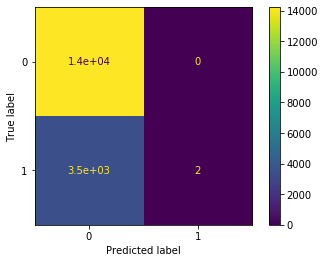

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,val_X,val_y)